Import

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

Read dataset

In [11]:
df = pd.read_csv("bmi.csv")
print(df.head())

   Gender  Height  Weight  Index
0    Male     174      96      4
1    Male     189      87      2
2  Female     185     110      4
3  Female     195     104      3
4    Male     149      61      3


Encode gender

In [12]:
le = LabelEncoder()
df['Gender_Code'] = le.fit_transform(df['Gender'])

Mempersiapkan fitur dan target

In [13]:
X = df[['Gender_Code', 'Height', 'Weight']]
y = df['Index']

Split data

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scale feature

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Train model

In [16]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

Evaluasi

In [17]:
y_pred = model.predict(X_test_scaled)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.67      1.00      0.80         4
           2       1.00      0.83      0.91        18
           3       0.73      1.00      0.84         8
           4       0.92      0.77      0.84        30
           5       0.88      0.95      0.91        39

    accuracy                           0.88       100
   macro avg       0.87      0.92      0.88       100
weighted avg       0.89      0.88      0.88       100



Plot

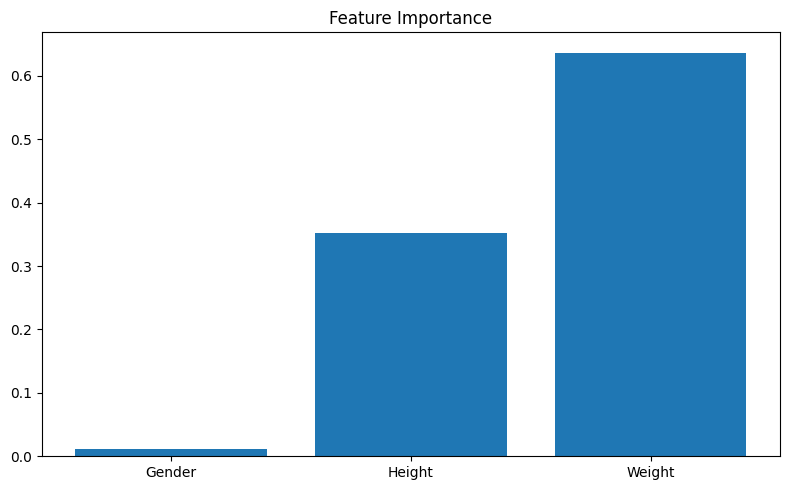

In [18]:
plt.figure(figsize=(8, 5))
plt.bar(['Gender', 'Height', 'Weight'], model.feature_importances_)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

Import model

In [19]:
import pickle
with open('bmi_classification_model.pkl', 'wb') as f:
    pickle.dump((model, scaler, le), f)

Test

In [20]:
# Test data
new_data = pd.DataFrame({
    'Gender': ['Male', 'Female', 'Male', 'Female'],
    'Height': [175, 162, 180, 165],
    'Weight': [85, 58, 90, 65]
})

# Prepare test data
new_data['Gender_Code'] = le.transform(new_data['Gender'])
X_new = new_data[['Gender_Code', 'Height', 'Weight']]
X_new_scaled = scaler.transform(X_new)

# Predict
predictions = model.predict(X_new_scaled)
probabilities = model.predict_proba(X_new_scaled)

# Calculate and display model accuracy
train_accuracy = model.score(X_train_scaled, y_train)
test_accuracy = model.score(X_test_scaled, y_test)

print(f"\nModel Accuracy:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Display results
results = new_data.copy()
results['Predicted_Index'] = predictions
results['Confidence'] = np.max(probabilities, axis=1)

print("\nPrediction Results:")
print(results)
print("\nConfidence Scores (Probabilities per class):")
for i, prob in enumerate(probabilities):
    print(f"Sample {i+1}: {dict(zip(model.classes_, prob.round(3)))}")


Prediction Results:
   Gender  Height  Weight  Gender_Code  Predicted_Index  Confidence
0    Male     175      85            1                3        0.91
1  Female     162      58            0                2        0.90
2    Male     180      90            1                3        0.61
3  Female     165      65            0                2        0.72

Confidence Scores (Probabilities per class):
Sample 1: {0: 0.0, 1: 0.0, 2: 0.03, 3: 0.91, 4: 0.05, 5: 0.01}
Sample 2: {0: 0.09, 1: 0.0, 2: 0.9, 3: 0.01, 4: 0.0, 5: 0.0}
Sample 3: {0: 0.0, 1: 0.01, 2: 0.34, 3: 0.61, 4: 0.04, 5: 0.0}
Sample 4: {0: 0.01, 1: 0.03, 2: 0.72, 3: 0.19, 4: 0.05, 5: 0.0}
